<a href="https://colab.research.google.com/github/adwi-ti/Netflix-analysis/blob/main/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###Loading the data set

In [2]:
df = pd.read_csv('netflix_titles.csv' , lineterminator='\n')

####preview of data


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


####Handling the missing values

In [5]:
df['director'].fillna('Unknown' , inplace=True)
df['cast'].fillna('Unknown' , inplace=True)
df['country'].fillna('Unknown' , inplace=True)
df.dropna(subset=['date_added'], inplace = True)
df.dropna(subset=['rating'], inplace = True)
df.dropna(subset=['duration'], inplace = True)


<ipython-input-5-e93605fcfd93>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown' , inplace=True)
<ipython-input-5-e93605fcfd93>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


###check for duplicate

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


###Droppnig the coloumns


In [9]:
cols = ['show_id' , 'cast' , 'date_added' , 'description']

In [10]:
df.drop(cols, axis = 1, inplace = True)

###removing *whitespaces* from 'listed_in'

In [15]:
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in').reset_index(drop = True)

###changing the 'listed_in' to catrgory type

In [18]:
df['listed_in'] = df['listed_in'].astype('category')

In [19]:
df.nunique()

,0
type,2
title,8790
director,4527
country,749
release_year,74
rating,14
duration,220
listed_in,42


##Data Visualization

In [21]:
sns.set_style('whitegrid')
df['listed_in'].describe()

,listed_in
count,19294
unique,42
top,International Movies
freq,2752


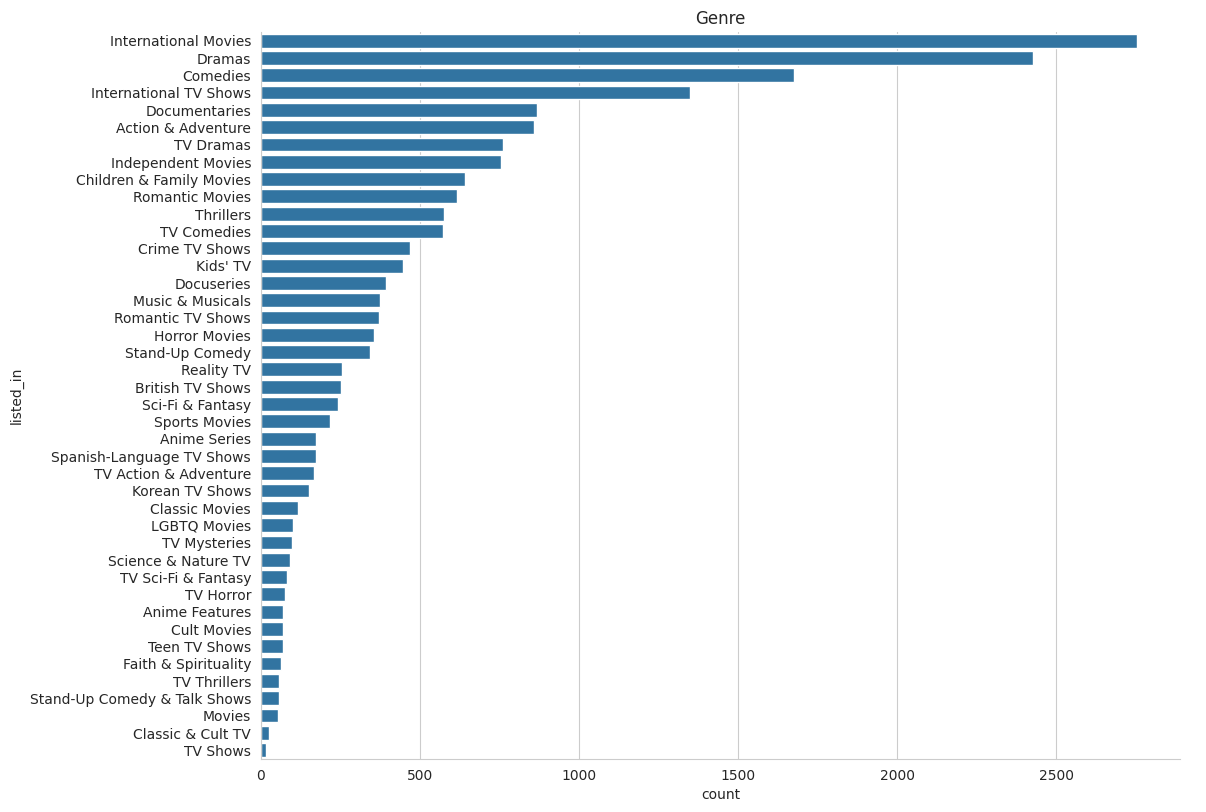

In [26]:
sns.catplot(y = 'listed_in' , data = df , kind = 'count' , order = df['listed_in'].value_counts().index , height=8, aspect=1.5)
plt.title('Genre')
plt.show()

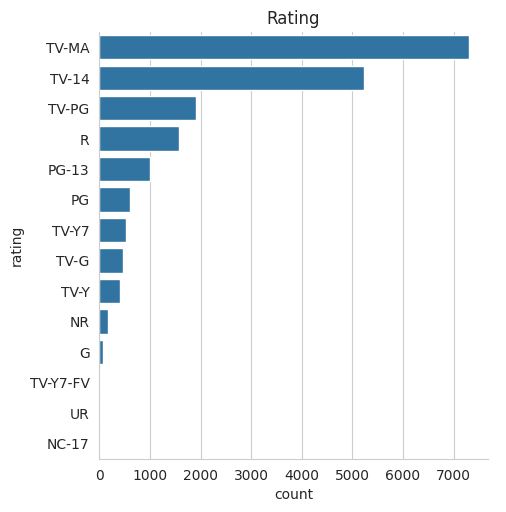

In [29]:
sns.catplot(y = 'rating' , data = df , kind ='count', order = df['rating'].value_counts().index)
plt.title('Rating')
plt.show()

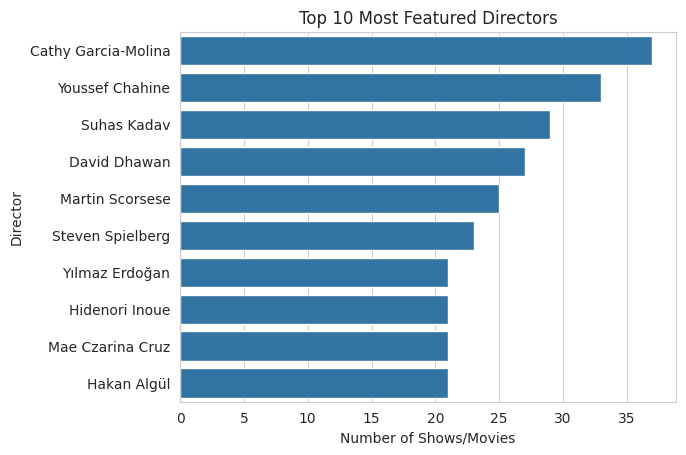

In [31]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Most Featured Directors')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Director')
plt.show()


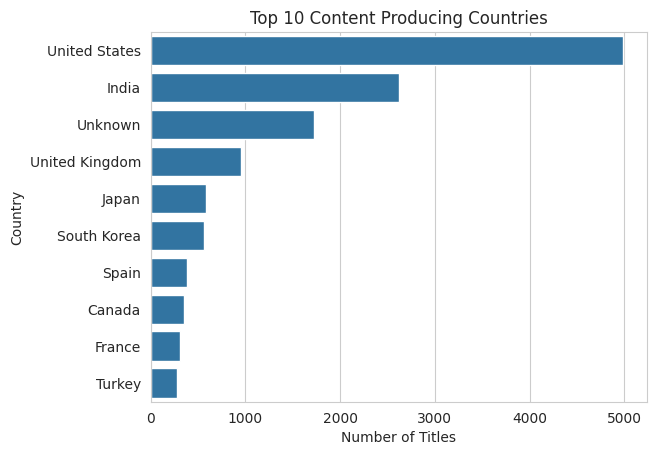

In [33]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()



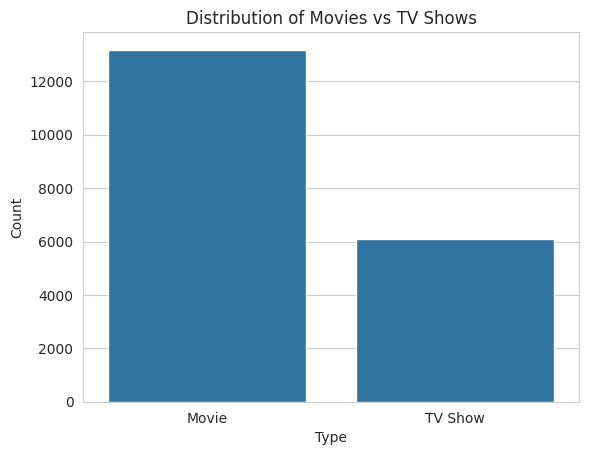

In [35]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
